In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy import constants

plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (10,8)

<h1> E14 Halbleiterdioden </h1>
<p>Simon Legtenborg, Leonie Parsiegel</p>

<h2>Aufgabe 1</h2>
<p>Nehmen Sie die Strom-Spannungs-Kennlinie einer Si-Diode, einer Zener-Diode (Z-Diode) und einer
Leuchtdiode auf. Stellen Sie diese in einem Diagramm graphisch dar.</p>

In [2]:
#Daten importieren

U = []
I = []

for i in range(3):
    DF = pd.DataFrame
    DF = pd.read_csv(f"./{i+1}.csv", delimiter=";", decimal=",")
    U.append(DF["U"].to_numpy())
    I.append(DF["I"].to_numpy())

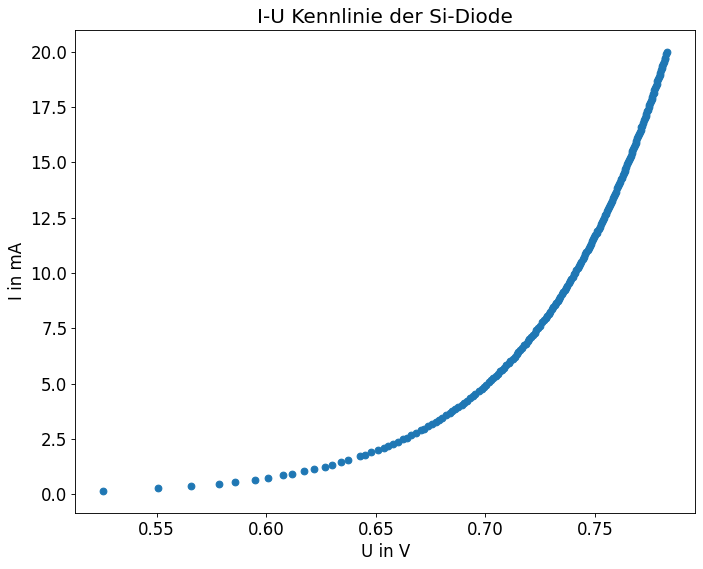

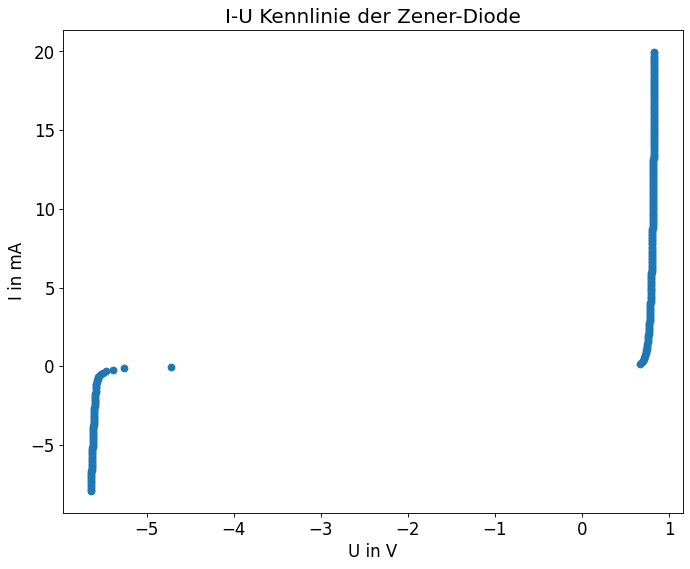

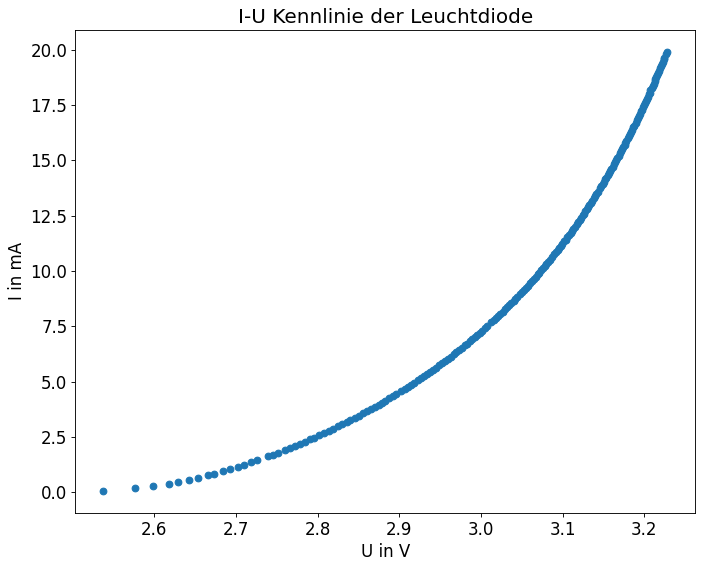

In [3]:
#Plot
names = ["Si-Diode", "Zener-Diode", "Leuchtdiode"]
for i in range(3):
    plt.figure(figsize=(10, 8), dpi=80)
    plt.rcParams.update({'font.size': 15})

    plt.title(f"I-U Kennlinie der {names[i]}")
    plt.xlabel("U in V")
    plt.ylabel("I in mA")

    plt.scatter(U[i],I[i]*1000)
    plt.show()

<h2>Aufgabe 2</h2>
<p>Bestimmen Sie für die Si-Diode den Emissionskoeffizienten durch Regression im ln(I)-U-Diagramm.
Für die Z-Diode sind die Z-Spannung sowie der Gleichstromwiderstand R und der differentielle
Widerstand rd für 0.2IZ,max zu ermitteln. Bestimmen Sie die Schleusenspannung einer Leuchtdiode
(LED) durch Regression des linearen Teils der Kennlinie im I-U-Diagramm. Schätzen Sie daraus die
mittlere emittierte Wellenlänge ab und vergleichen Sie das Ergebnis mit Ihren Beobachtungen.</p>

<h3>Si-Diode</h3>

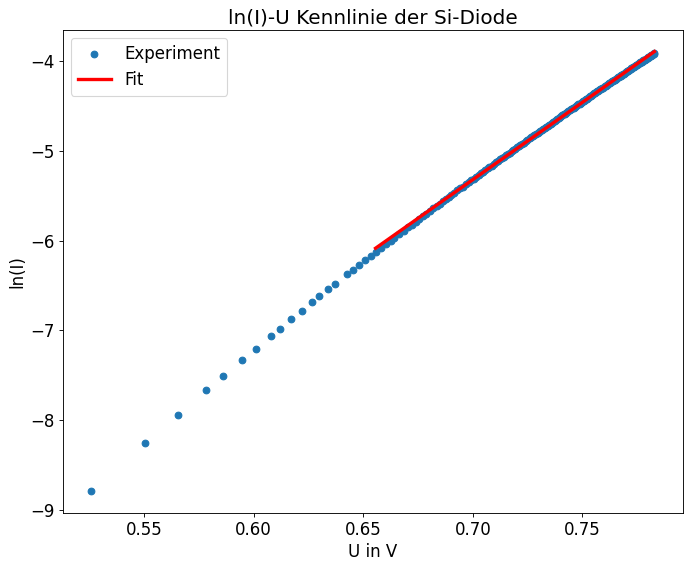

In [4]:
#Si-Diode plotten und fitten
def linear(x,m,n):
    return m*x+n

k = 20
s1, cov1  = curve_fit(linear, U[0][k::], np.log(I[0])[k::])

plt.figure(figsize=(10, 8), dpi=80)
plt.rcParams.update({'font.size': 15})

plt.title(f"ln(I)-U Kennlinie der {names[0]}")
plt.xlabel("U in V")
plt.ylabel("ln(I)")

plt.scatter(U[0],np.log(I[0]), label="Experiment")
plt.plot(U[0][k::], linear(U[0][k::], s1[0], s1[1]), color="red", label="Fit", lw="3")
plt.legend()
plt.show()

<p> Für große U gilt in guter Näherung:
$$ln(I)= ln(I_s) + \frac{1}{n \cdot U_T} \cdot U$$
Und für die Steigung:
$$m = \frac{1}{n \cdot U_T}$$
Damit gilt für unseren Emissionskoeffizient:
$$n = \frac{1}{m \cdot U_T}$$
$$\Delta n = \sqrt{\left( \frac{\Delta m}{m²U_T} \right)^2 + \left( \frac{\Delta U_T}{mU_T^2} \right)^2 }$$

In [5]:
#Werte ausgeben
UT1 = 25*10**-3
dUT1 =25*10**-4

m1 = np.round(s1[0],2)
dm1 = np.round(np.sqrt(cov1[0,0]),2)

n = np.round(1/(m1*UT1),1)
dn = np.round(np.sqrt((dm1/(m1**2*UT1))**2+(dUT1/(m1*UT1**2))**2),2)

print(f"m: {m1}+-{dm1}")
print(f"n = {n} +- {dn}")

m: 17.24+-0.03
n = 2.3 +- 0.23


<h3>Zener-Diode</h3>

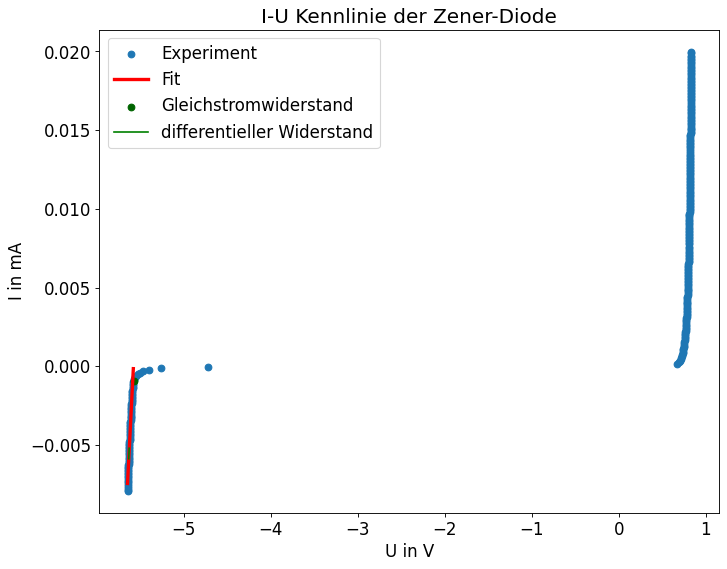

In [6]:
%matplotlib inline
#Daten Zener-Diode plotten und fitten

Ug = -5.573
Ig = -0.000931

diffU1 = -5.62386
diffI1 = -0.005202

diffU2 = -5.62932
diffI2 = -0.005872


k = 80
z = 10
s2b, cov2b  = curve_fit(linear, U[1][z:k:], I[1][z:k:])

plt.figure(figsize=(10, 8), dpi=80)
plt.rcParams.update({'font.size': 15})

plt.title(f"I-U Kennlinie der {names[1]}")
plt.xlabel("U in V")
plt.ylabel("I in mA")

plt.scatter(U[1],I[1], label="Experiment")
plt.plot(U[1][z:k:], linear(U[1][z:k:], s2b[0], s2b[1]), label="Fit", color="red", lw=3)
plt.scatter(Ug, Ig, label="Gleichstromwiderstand", color="darkgreen")
plt.plot([diffU1, diffU2], [diffI1, diffI2], label="differentieller Widerstand", color="green")
plt.legend()
plt.show()

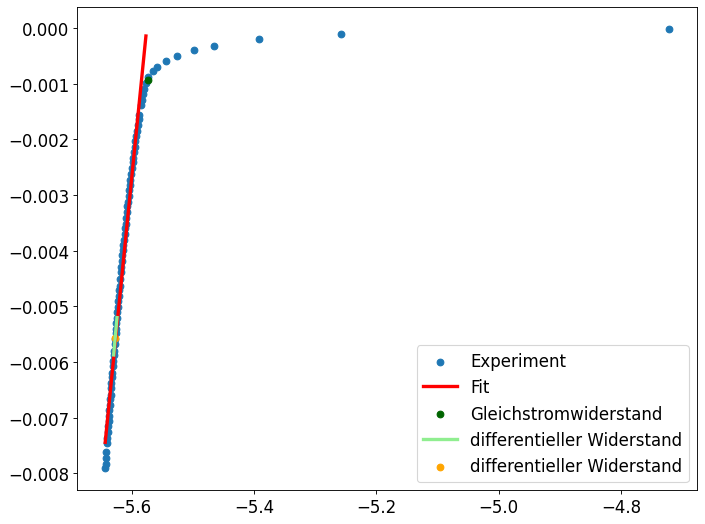

In [7]:
plt.figure(figsize=(10, 8), dpi=80)
plt.rcParams.update({'font.size': 15})

plt.scatter(U[1][0:k:],I[1][0:k:], label="Experiment")
plt.plot(U[1][10:k:], linear(U[1][10:k:], s2b[0], s2b[1]), label="Fit", color="red", lw=3)
plt.scatter(Ug, Ig, label="Gleichstromwiderstand", color="darkgreen")
plt.plot([diffU1, diffU2], [diffI1, diffI2], label="differentieller Widerstand", color="lightgreen", lw=3)
plt.scatter([-5.62699], [-0.005573], label="differentieller Widerstand", color="orange")
plt.legend()
plt.show()

9Für die Zener-Spannung gilt also:
$$U_z=-\frac{n}{m}$$
Für den Gleichstromwiderstand gilt:
$$R = \frac{U_g}{I_g}$$
Für den differentiellen Widerstand gilt:
$$r = \frac{\Delta U}{\Delta I}$$

In [8]:
#Daten ausgeben
m2b = np.round(s2b[0],4)
dm2b = np.round(cov2b[0,0],5)

n2b = np.round(s2b[1], 4)
dn2b = np.round(cov2b[1,1],5)

Uz2b = -n2b/m2b

Rg = Ug/Ig

r = (diffU2-diffU1)/(diffI2-diffI1)

print(f"Zener-Spannung: {np.round(Uz2b,3)} V")
print(f"Gleichstromwiderstand: {np.round(Rg,3)} Ohm")
print(f"differentieller Widerstand: {np.round(r,3)} Ohm")

Zener-Spannung: -5.573 V
Gleichstromwiderstand: 5986.037 Ohm
differentieller Widerstand: 8.149 Ohm


<h3>Leuchtdiode</h3>

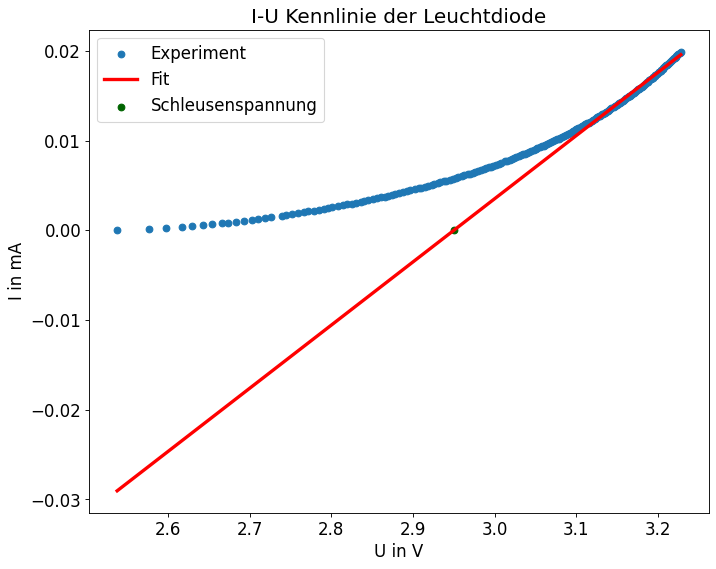

In [9]:
%matplotlib inline
#Daten Leuchtiode plotten

k = 120
s2c, cov2c  = curve_fit(linear, U[2][k::], I[2][k::])

plt.figure(figsize=(10, 8), dpi=80)
plt.rcParams.update({'font.size': 15})

plt.title(f"I-U Kennlinie der {names[2]}")
plt.xlabel("U in V")
plt.ylabel("I in mA")

plt.scatter(U[2],I[2], label="Experiment")
plt.plot(U[2], linear(U[2], s2c[0], s2c[1]), label="Fit", color="red", lw=3)
plt.scatter(-s2c[1]/s2c[0], 0, color="darkgreen", label="Schleusenspannung")
plt.legend()
plt.show()

Für die Schleusenspannung gilt also:
$$U_s = -\frac{n}{m}$$
Daraus folgt für die gemittelte Wellenlänge:
$$\lambda \approx \frac{h \cdot c}{e \cdot U_s}$$

In [10]:
#Werte ausgeben
m2c = s2c[0]
dm2c = cov2c[0,0]

n2c = s2c[1]
dn2c = cov2c[1,1]

Us = np.round(- n2c/m2c,2)

h = constants.h
c = constants.c
e = constants.e

Lambda = np.round(h*c/(e*Us),10)

print(f"Us = {Us}V")
print(f"l= {Lambda*10**9}nm")

Us = 2.95V
l= 420.3nm


<h2>Aufgabe 3</h2>
Bestimmen Sie die Sperrschichtkapazität einer Si-Leistungsdiode in Abhängigkeit von der
Sperrspannung mit einem Resonanzverfahren. Ermitteln Sie die Sperrschichtweite der
Raumladungszone bei der Sperrspannung U = 0.

In [11]:
DF = pd.DataFrame
DF = pd.read_csv(f"./4.csv", delimiter=",", decimal=".")
U3 = -DF["U"].to_numpy()
f = DF["f"].to_numpy()

L = 220*10**-3
C = 2*10**-6
Rv = 1000
Rm = 100

Ctot = 1/(L*(2*np.pi*f)**2)

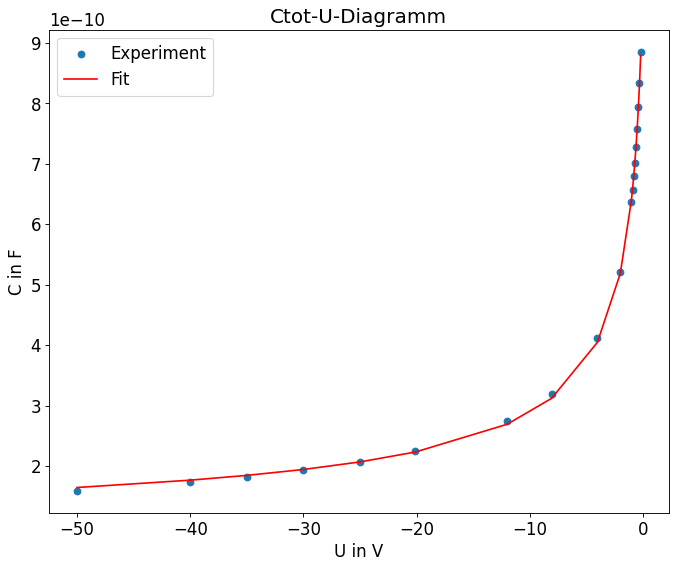

In [12]:
#Ctot-U Diagramm

def model(x,Cg, C0, Ud):
    return Cg+C0*np.sqrt(Ud/(Ud-x))

s3, cov3  = curve_fit(model, U3, Ctot)

plt.figure(figsize=(10, 8), dpi=80)
plt.rcParams.update({'font.size': 15})

plt.title("Ctot-U-Diagramm")
plt.xlabel("U in V")
plt.ylabel("C in F")

plt.scatter(U3, Ctot, label="Experiment")
plt.plot(U3, model(U3, s3[0], s3[1], s3[2]), label="Fit", color="red")
plt.legend()
plt.show()

In [13]:
#wichtige Werte
Cg = s3[0]
C0 = s3[1]
Ud = s3[2]

Cs = Ctot-Cg
print(f"C_g = {np.round(Cg,12)}F")
print(f"C_0 = {np.round(C0,12)}F")
print(f"Ud = {np.round(Ud,2)}V")

C_g = 6e-11F
C_0 = 9.44e-10F
Ud = 0.62V


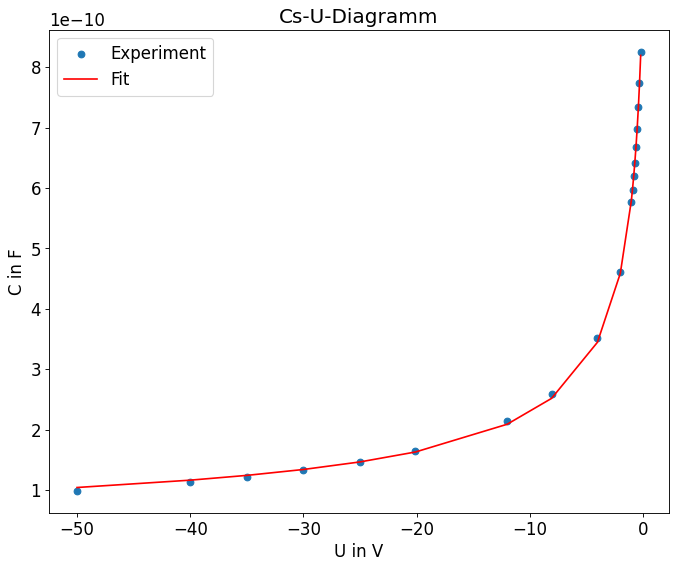

In [14]:
#Cs-U Diagramm
plt.figure(figsize=(10, 8), dpi=80)
plt.rcParams.update({'font.size': 15})

plt.title("Cs-U-Diagramm")
plt.xlabel("U in V")
plt.ylabel("C in F")

plt.scatter(U3, Cs, label="Experiment")
plt.plot(U3, model(U3, s3[0], s3[1], s3[2])-Cg, label="Fit", color="red")
plt.legend()
plt.show()

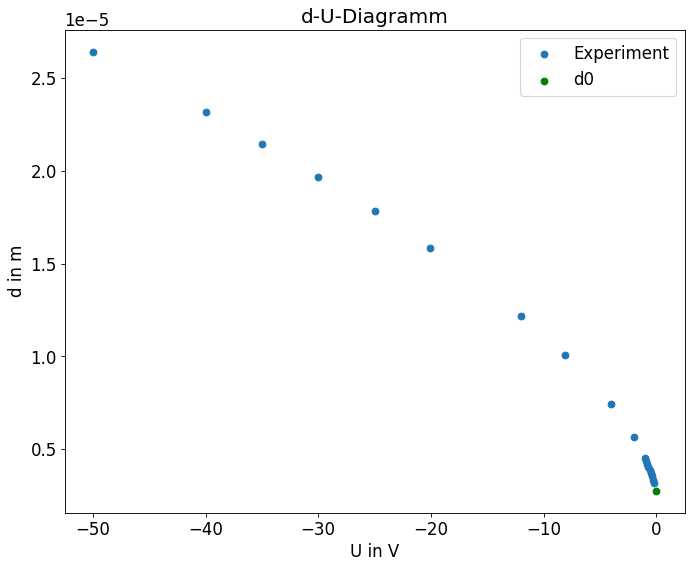

d = 2.77µm


In [15]:
#ds-U Diagramm
er = 11.8
e0 = constants.epsilon_0
A = 25*10**-6
ds = er*e0*A/Cs

plt.figure(figsize=(10, 8), dpi=80)
plt.rcParams.update({'font.size': 15})

plt.title("d-U-Diagramm")
plt.xlabel("U in V")
plt.ylabel("d in m")

plt.scatter(U3, ds, label="Experiment")
plt.scatter(0,er*e0*A/C0, color="green", label="d0")


plt.legend()
plt.show()

print(f"d = {np.round(er*e0*A/C0*10**6,2)}µm")